# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.046477e+01     7.038099e+00
 * time: 0.0015628337860107422
     1     2.898281e+01     5.413131e+00
 * time: 0.007153987884521484
     2     1.955429e+01     4.496817e+00
 * time: 0.013533830642700195
     3     1.444656e+01     4.287562e+00
 * time: 0.01997685432434082
     4     1.436137e+01     6.847582e+00
 * time: 0.025828838348388672
     5     1.153520e+01     2.044871e+00
 * time: 0.031181812286376953
     6     9.840648e+00     3.066689e+00
 * time: 0.036003828048706055
     7     9.014146e+00     1.720497e+00
 * time: 0.04144597053527832
     8     8.778162e+00     1.654771e+00
 * time: 0.04637789726257324
     9     8.612155e+00     1.313552e+00
 * time: 0.05148601531982422
    10     8.412135e+00     9.001443e-01
 * time: 0.0576930046081543
    11     8.276690e+00     5.430116e-01
 * time: 0.06354594230651855
    12     8.233655e+00     8.083269e-01
 * time: 0.06784582138061523
    13     8.170747e+00     4.375137e-01
 *

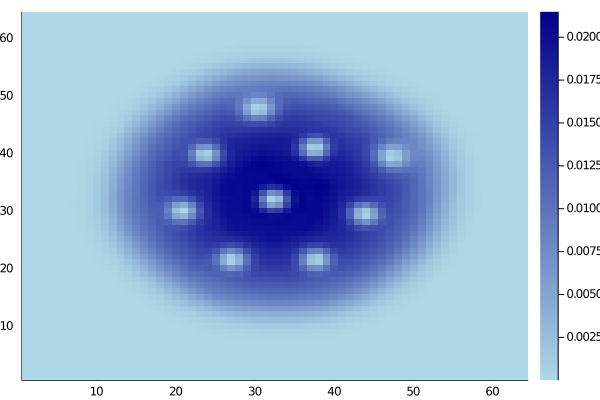

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)